In [1]:
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt
import time
from supplementary_code import *

In [2]:
nq = 10
depth = int(nq/2)
dev = qml.device("default.qubit", wires= nq) 

In [3]:
nq

10

In [4]:
Delta = 1.0
H = H_XXZ(Delta,wires=range(nq))

print(H)

  (1) [X0 X1]
+ (1) [Y0 Y1]
+ (1.0) [Z0 Z1]
+ (1) [X1 X2]
+ (1) [Y1 Y2]
+ (1.0) [Z1 Z2]
+ (1) [X2 X3]
+ (1) [Y2 Y3]
+ (1.0) [Z2 Z3]
+ (1) [X3 X4]
+ (1) [Y3 Y4]
+ (1.0) [Z3 Z4]
+ (1) [X4 X5]
+ (1) [Y4 Y5]
+ (1.0) [Z4 Z5]
+ (1) [X5 X6]
+ (1) [Y5 Y6]
+ (1.0) [Z5 Z6]
+ (1) [X6 X7]
+ (1) [Y6 Y7]
+ (1.0) [Z6 Z7]
+ (1) [X7 X8]
+ (1) [Y7 Y8]
+ (1.0) [Z7 Z8]
+ (1) [X8 X9]
+ (1) [Y8 Y9]
+ (1.0) [Z8 Z9]
+ (1) [X9 X0]
+ (1) [Y9 Y0]
+ (1.0) [Z9 Z0]


In [5]:
params = np.array([np.pi for _ in range(4*depth)])

In [6]:
@qml.qnode(dev)
def circuit(params, Delta, depth=depth, nq=nq):
    
    HVA_ansatz(params, Delta, depth, range(nq))
    
    return qml.expval(H)

In [7]:
cost_fn = lambda w: circuit(w, Delta=Delta, depth=depth, nq=nq)

In [8]:
start_time = time.time()    

steps = 200

optimizer = qml.AdamOptimizer(stepsize=0.5)
best_cost = cost_fn(params)
best_params = params

for j in range(steps+1):
    params2 = params
    params, cost = optimizer.step_and_cost(cost_fn, params)

    if cost < best_cost:
        best_params = params2
        best_cost = cost
        
    if j!=0 and j % 2 == 0:
        print(f"Cost at Step {j}: {cost}")

end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

Cost at Step 2: -8.269862316481365
Cost at Step 4: -4.401939204792133
Cost at Step 6: -3.6425504242794395
Cost at Step 8: -2.9504391875847045
Cost at Step 10: -9.13735018837222
Cost at Step 12: -11.663438684496462
Cost at Step 14: -11.206953359797948
Cost at Step 16: -14.869926088553154
Cost at Step 18: -15.160505588233217
Cost at Step 20: -16.320337207464387
Cost at Step 22: -15.854883065451833
Cost at Step 24: -16.534475917173836
Cost at Step 26: -16.20206744596623
Cost at Step 28: -16.860637869968432
Cost at Step 30: -16.900280530900574
Cost at Step 32: -17.132619131545976
Cost at Step 34: -17.06400990351912
Cost at Step 36: -17.153026220153066
Cost at Step 38: -17.205836220294568
Cost at Step 40: -17.42416270828381
Cost at Step 42: -17.453509008645806
Cost at Step 44: -17.46536578858119
Cost at Step 46: -17.509153042155262
Cost at Step 48: -17.5739952087302
Cost at Step 50: -17.548041122694702
Cost at Step 52: -17.646680523042363
Cost at Step 54: -17.638486055243888
Cost at Step 56

In [9]:
print(best_cost)

-17.907408108738277


In [10]:
print(cost_fn(best_params))

-17.907408108738277


In [11]:
print(np.array(best_params))

[5.43343117 5.63487601 2.88866014 2.93114534 2.49453081 2.56768388
 3.19973649 3.23799654 1.97939938 1.7029967  2.96169648 2.95308626
 2.37670868 2.39771125 2.31808501 2.32021458 2.77743722 2.75394168
 2.62493976 2.57934117]


In [12]:
for i in range(1,10):
    
    corr = corr_function(i, best_params,0.5,depth,nq)
    
    print(i,np.abs(corr))

1 0.03136425796017714
2 0.19473777633322517
3 0.0576912218507076
4 0.14306576545396202
5 0.18101827127428638
6 0.14306576545396238
7 0.1140562253292316
8 0.19473777633322475
9 0.16837539066968404


In [13]:
# Time evolution

corr_t = []
t = []
i =  3
dt = 1/400

start_time = time.time()    
for step in range(401):
    
    t.append(dt*step)
    
    corr_dt = corr_function(i, best_params, Delta, depth, nq, perturbation='state',timesteps=step)
    
    print(step,corr_dt)
    corr_t.append(corr_dt)
    
end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

0 -0.253621813555984
1 -0.253815817763053
2 -0.25401146913185424
3 -0.2542087171798586
4 -0.25440751055557376
5 -0.25460779705500514
6 -0.25480952363848586
7 -0.2550126364478723
8 -0.2552170808241011
9 -0.25542280132509
10 -0.25562974174398756
11 -0.2558378451277574
12 -0.25604705379608794
13 -0.25625730936062785
14 -0.25646855274453156
15 -0.2566807242023088
16 -0.25689376333997394
17 -0.25710760913548214
18 -0.25732219995944455
19 -0.2575374735961168
20 -0.2577533672646493
21 -0.25796981764059257
22 -0.2581867608776451
23 -0.25840413262964024
24 -0.2586218680727584
25 -0.25883990192795525
26 -0.25905816848360175
27 -0.25927660161831745
28 -0.25949513482399966
29 -0.2597137012290244
30 -0.25993223362162177
31 -0.26015066447341095
32 -0.26036892596308425
33 -0.26058695000022736
34 -0.26080466824927473
35 -0.2610220121535829
36 -0.26123891295961177
37 -0.26145530174120674
38 -0.26167110942396943
39 -0.261886266809706
40 -0.26210070460094537
41 -0.26231435342551435
42 -0.2625271438611626

339 -0.21748842790727316
340 -0.21740420228554894
341 -0.217323269601285
342 -0.2172456164559412
343 -0.21717122876629036
344 -0.21710009176973302
345 -0.21703219002968688
346 -0.2169675074410392
347 -0.2169060272356729
348 -0.2168477319880512
349 -0.2167926036208719
350 -0.21674062341078087
351 -0.2166917719941498
352 -0.2166460293729098
353 -0.21660337492044773
354 -0.21656378738755808
355 -0.21652724490845301
356 -0.21649372500682612
357 -0.21646320460197238
358 -0.21643566001496
359 -0.21641106697485918
360 -0.21638940062501497
361 -0.21637063552938232
362 -0.21635474567890145
363 -0.2163417044979305
364 -0.2163314848507235
365 -0.21632405904795904
366 -0.21631939885331744
367 -0.21631747549010524
368 -0.21631825964792864
369 -0.21632172148941334
370 -0.21632783065697267
371 -0.21633655627962078
372 -0.21634786697983596
373 -0.21636173088046767
374 -0.21637811561169162
375 -0.2163969883180124
376 -0.21641831566531206
377 -0.21644206384794418
378 -0.21646819859587907
379 -0.21649668

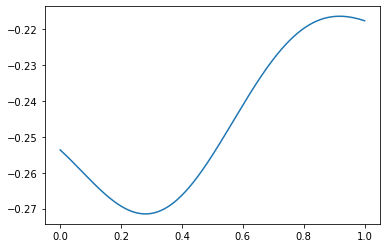

In [15]:
plt.plot(np.linspace(0,1,401),np.real(corr_t))

In [16]:
np.array(corr_t)

tensor([-0.25362181, -0.25381582, -0.25401147, -0.25420872, -0.25440751,
        -0.2546078 , -0.25480952, -0.25501264, -0.25521708, -0.2554228 ,
        -0.25562974, -0.25583785, -0.25604705, -0.25625731, -0.25646855,
        -0.25668072, -0.25689376, -0.25710761, -0.2573222 , -0.25753747,
        -0.25775337, -0.25796982, -0.25818676, -0.25840413, -0.25862187,
        -0.2588399 , -0.25905817, -0.2592766 , -0.25949513, -0.2597137 ,
        -0.25993223, -0.26015066, -0.26036893, -0.26058695, -0.26080467,
        -0.26102201, -0.26123891, -0.2614553 , -0.26167111, -0.26188627,
        -0.2621007 , -0.26231435, -0.26252714, -0.26273901, -0.26294987,
        -0.26315967, -0.26336833, -0.26357579, -0.26378197, -0.26398681,
        -0.26419024, -0.26439218, -0.26459258, -0.26479135, -0.26498844,
        -0.26518378, -0.26537729, -0.26556892, -0.26575859, -0.26594624,
        -0.2661318 , -0.2663152 , -0.26649639, -0.26667529, -0.26685184,
        -0.26702598, -0.26719764, -0.26736677, -0.2